# Math - Probability and Statistics

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rhennig/EMA6938/blob/main/Notebooks/2.Math_Probability.ipynb)

Probability and Statistics are the foundation of Data Science. In fact, the underlying principles of machine learning and artificial intelligence are nothing but statistics, linear algebra, and differential calculus.

**Probability** is the branch of mathematics concerning numerical descriptions of how likely an event is to occur, or how likely it is that a proposition is true. **Statistics** is the discipline that concerns the collection, organization, analysis, interpretation, and presentation of data.

In this tutorial, we will
- Learn about probability rules and terms like random variables, probability distributions functions
- Learn about different probability distributions functions along with some of their properties.
- Learn to create and plot these distributions in python.

**Sources:** This notebook uses materials from the hackerearth statistics tutorial https://www.hackerearth.com/practice/machine-learning/, the datacamp tutorial on probability https://www.datacamp.com/community/tutorials/probability-distributions-python., and the lecture notes from Probability Theory for Machine Learning
by Chris Cremer, https://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/tutorial1.pdf.

### Preliminaries
Import the plotting and image packages.

In [1]:
# Install the venngig package using pip in the current Jupyter kernel
# To use vennfig, you may need to restart the kernel
import sys
!{sys.executable} -m pip install vennfig
!{sys.executable} -m pip install seaborn
import vennfig as v
from IPython.display import Image
from IPython.core.display import HTML

## 1. Motivation
Uncertainty arises from:
- Noisy measurements
- Finite size of data sets
- Ambiguity: The word bank can mean (1) a financial institution, (2) the side of a river, or (3) tilting an airplane. Which meaning was intended, based on the words that appear nearby?
- Limited Model Complexity

Probability theory provides a consistent framework for the quantification
and manipulation of uncertainty. It enables optimal predictions given all the information available, even though that information may be incomplete or ambiguous.

## 2. Terminology for probability, events, and sample space

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Coin_Toss_%283635981474%29.jpg/440px-Coin_Toss_%283635981474%29.jpg" alt="Coin Flip" align="right" style="width: 200px;float: right;"/>

The **probability** gives the information about how likely an event can occur. The probability of an event is a number between 0 and 1, where, roughly speaking, 0 indicates impossibility of the event and 1 indicates certainty. The higher the probability of an event, the more likely it is that the event will occur.

The **sample space** Ω is the set of possible outcomes of an experiment. Points ω in Ω are called **sample outcomes**, realizations, or elements. Subsets of Ω are called **events**.

Example: If we toss a coin twice then the sample space is Ω = {HH, HT, TH, TT}. The event that the first toss is heads is A = {HH, HT}.

We say that events $A_1$ and $A_2$ are **disjoint** (mutually exclusive) if $A_i ∩ A_j = \{\}$.

Example: First flip being heads and first flip being tails are disjoint events.

## 3. Basic probability calculation

As per the definition, if $A$ is an event of an experiment and it contains $n$ outcomes and Ω is the sample space then the probability of $A$ is
$$
P(A) = \sum_{i=1}^n P(E_i),
$$
where $E_1 \dots E_n$ are the outcomes in $A$. If all the outcomes of the experiment are equally likely then

$$
P(A) = \frac{\text {No. of outcomes in A}}{\text{No. of outcomes in Ω}}.
$$

Hence the value of probability is between 0 and 1. As the sample space is the whole possible set of outcomes, $P(S) = 1.$

**Complement of A:** Complement of an event $A$ means not($A$). Probability of complement event of $A$ means the probability of all the outcomes in sample space other than the ones in $A$. Denoted by $A^c$ and
$$
P(A^c) = 1 - P(A).
$$

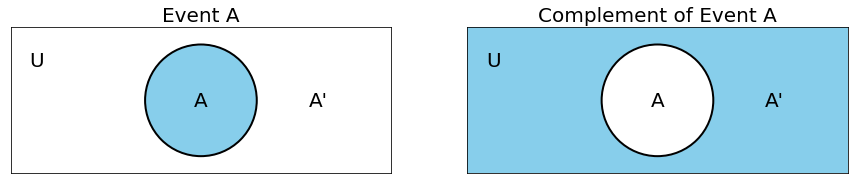

In [2]:
v.complement(title_a='Event A', title_b='Complement of Event A', set_a='A', set_b="A'")

**Union and Intersection:** The union of two events $A$ and $B$ is the combination of all outcomes contained in the events. The intersection of two events $A$ and $B$ is the set of outcomes of $A$ that also belong to $B$.

The probability of intersection of two events $A$ and $B$ is $P(A\cap B)$. When event $A$ occurs in union with event $B$ then the probability together is defined as
$$
P(A \cup B) = P(A) + P(B)- P(A \cap B),
$$
which is also known as the **addition rule of probability**.

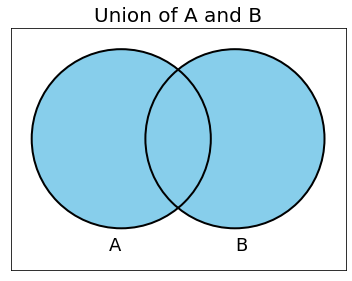

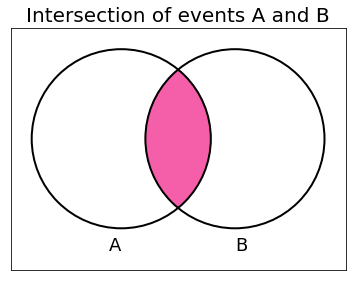

In [3]:
v.true_false(subs=2, size=6, bg_color='white', title_a='Union of A and B')
v.and_nand(subs=2, size=6, fill_color='#f55faa', bg_color='white', 
         title_a='Intersection of events A and B')

**Mutually exclusive:** Any two events are mutually exclusive, meaning they cannot both happen at the same time, when they have non-overlapping outcomes. If $A$ and $B$ are two mutually exclusive events then,
$P(A \cap B) = 0$. From the addition rule of probability
$P(A \cup B) = P(A) + P(B)$ as $A$ and $B$ are disjoint or mutually exclusive events.

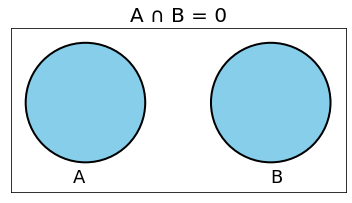

In [4]:
v.mut_exclusive(size=6, title='A ∩ B = 0')

**Independent:** Any two events are independent of each other if one has zero effect on the other, *i.e.*, the occurrence of one event doe not affect the occurrence of the other. If $A$ and $B$ are two independent events then, 
$$
P(A \cap B) = P(A)\, P(B).
$$

## 4. Joint, Marginal, and Conditional Probabilities

https://machinelearningmastery.com/joint-marginal-and-conditional-probability-for-machine-learning/

In machine learning, we often have many random variables that interact in often complex and unknown ways.

There are specific techniques that can be used to quantify the probability for multiple random variables, such as the marginal, joint, and conditional probability. These techniques provide the basis for a probabilistic understanding of fitting a predictive model to data.

- **Marginal probability**, $P(A)$, is the probability of an event, $A$, occuring irrespective of the outcome of other events.
- **Joint probability**, $P(AB)$, is the probability of two events, $A$ and $B$, occurring simultaneously.
- **Conditional probability**, $P(A|B)$, is the probability of one event, $A$, given a second event, $B$.

### Probabilities Rules
- Assuming that $P(B) > 0$, the conditional probability of $A$ given $B$:
$$
P(A|B)=P(AB)/P(B)
$$
- Product rule for joint probability:
$$
P(AB) = P(A|B)P(B) = P(B|A)P(A)
$$
- Two events $A$ and $B$ are **independent** if the joint probability is the product of the marginals
$$
P(AB) = P(A)P(B)
$$

### Example:
- 80% of students pass the final and 60% pass both the final and the midterm.
- What percent of students who passed the final also passed the midterm?

- Reworded: What percent of students passed the midterm given they passed the final?
$$
P(M|F) = P(MF) / P(F) = 0.60 / 0.80 = 0.75
$$

### Sum Rule and Law of Total Probability
- Sum Rule (Marginalization)
$$
P(A) = \sum_B P(AB)
$$

- Law of Total Probability
$$
P(A) = \sum_B P(A|B) \, P(B)
$$

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif" alt="Thomas Bayes" align="right" style="width: 200px;float: right;"/>

## 5. Bayes' Theorem
Bayes' Theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It is named after Thomas Bayes (shown on the right), an English Statistician, Philosopher, Presbyterian Minister living from 1701 to 1761. Bayes' work was published after his dead by Richard Price, who edited and corrected Bayes' manuscript. The modern formulation of Bayes theorem was devised by Pierre-Simon Laplace in 1774, who was unaware of Bayes' work.

Bayes' theorem states
$$
P(H|E) = \frac{P(H)\, P(E|H)}{P(E)}.
$$

We are interested in calculating the probability $P(H|E)$, which is the conditional probability the hypthesis, H, is true given the evidence, E. It is called the **posterior probability**.

The probability $P(E|H)$ is the probability of seeing the evidence, if the hypothesis is true. It is called the **likelihood**.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Bayes%27_Theorem_MMB_01.jpg/1600px-Bayes%27_Theorem_MMB_01.jpg" alt="Neon sign of Bayes theorem" align="right" style="width: 300px;float: right;"/>

The probabilities $P(H)$ is the probability the hypothesis is true before any evidence is present. This marginal probability of call the **prior**.

The probability $P(B)$ is the probability of observing the evidence $E$.
    
The image on the right shows Bayes' theorem spelt out in blue neon at the offices of Autonomy in Cambridge, a company specializing in finger print recognition.

### Example of Bayes' Theorem: Sensitivity and Specificity

Bayes' theorem elegantly demonstrates the effect of false positives and false negatives in medical tests.

**Sensitivity** is the true positive rate. It measures the fraction of correctly identified positives. In a Covid-19 test, it is be the percentage of people with a positive test who have Covid. A sensitive test rarely misses a positive.

**Specificity** is the true negative rate. It measures the fraction of correctly identified negatives. In a Covid-19 test, it is be the percentage of people with a negative test who do not have Covid. A specific test rarely registers a false positive.

A perfect test would be 100 percent sensitive and specific. In reality, tests have a minimum error called the Bayes error rate.

For example, consider a Covid-19 test that is 90% sensitive and 80% specific. If 5% of people have Covid-19, what is the probability a random person with a positive test actually has Covid?

In [5]:
# P is the event of a positive test and C is event of having Covid
P_C    = 0.05  # Percentage of population that has Covid
P_PC   = 0.90  # Sensitivity or true positive rate. The probability of having Covid when the test was positive.
P_PcCc = 0.80  # Specificity or true negative rate. The probability of not having Covid when the test was negative.

P_PCc  = 1 - P_PcCc  # False positive rate. Probability of having Covid when the test was negative. 

# We use the Law of Total Probability to calculate the denominator of Bayes' Theorem P(E),
# the probability of having a postive test
P_P = P_PC * P_C + P_PCc * (1-P_C)

# Bayes Theorem
P_CP = P_C * P_PC / P_P

print("Probability of a random person with a positive test having Covid = ", round(P_CP*100,1), "%")

Probability of a random person with a positive test having Covid =  19.1 %


Questions:
1) How does this probability change when Covid is more prevalent, like 20 % of the population?
2) What happens for very rare diseases that only occur for 1 in 10,000 people for the same test accuracy?

## 6. Random Variables

### Discrete and Continuous Random Variables

A random variable is a variable whose possible values are numerical outcomes of a random phenomenon. 

Example: Flip a coin ten times. Let X(ω) be the number of heads in the sequence ω. If ω = HHTHHTHHTT, then X(ω) = 6.

There are two types of random variables, discrete and continuous.

A **discrete random variable** takes on only a countable number of distinct values and thus can be quantized.

Example:
- The number that comes up when you roll a fair dice. X can take values : [1, 2, 3, 4, 5, 6].
- The number of heads coming up when rolling a dice a fixed number of times.

A **continuous random variable** can take on infinitely many values and is described by a real number.

Example:
- Time taken to accomplish task.
- Height of graduate students in MSE.

### Probability Distribution

A probability distribution is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Discrete_probability_distrib.svg/640px-Discrete_probability_distrib.svg.png" alt="Probability distribution" align="right" style="width: 200px;float: right;"/>

The **probability distribution of a discrete random variable** is a list of probabilities associated with each of its possible values. It is also sometimes called the probability function or the probability mass function. An example is shown on the right for a random variable describing three possible events.

Suppose a random variable $X$ takes $k$ different values, with the probability that $X = x_i$ given by $P(x_i) = p_i$. The probabilities $p_i$ must satisfy

1) $0 < p_i < 1$ for each i
2) $\sum_{i=1}^k p_i = 1$.

Examples of discrete probability distributions are the Bernoulli, Binomial, and Poisson distribution.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/640px-Standard_deviation_diagram.svg.png" alt="Probability distribution function" align="right" style="width: 200px;float: right;"/>

A continuous random variable is defined over an interval of values. The **probability distribution of a continuous random variable**, known as probability distribution functions, are the functions that take on continuous values. The example of a normal or Gaussian probability distribution function is shown on the right.

The probability of observing any single value is equal to 0 since the number of values which may be assumed by the random variable is infinite. 

A random variable $X$ may take all values over an interval of real numbers. Then the probability $P(A)$ that $X$ is in the set of outcomes $A$ is defined to be the area in the curve over the set $A$.

The curve, which represents a function $p(x)$, must satisfy the following:
1) The curve has no negative values (p(x)>0 for all x
2) The total area under the curve is equal to 1, $\int p(x) dx = 1$.

Some examples of continuous probability distributions are normal the distribution, exponential, and beta distribution.

There’s another type of distribution that is relevant for random variables, the cumulative distribution function. All random variables (discrete and continuous) have a cumulative distribution function. It is a function giving the probability that the random variable $X$ is less or equal than $x$, for every value $x$. For a discrete random variable, the cumulative distribution function is found by summing up the probabilities. For continuous random variables, it is given by the integral from $-\infty$ to $x$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Combined_Cumulative_Distribution_Graphs.png/800px-Combined_Cumulative_Distribution_Graphs.png" alt="Probability distribution function" align="center" style="width: 600px;float: center;"/>
The left figure shows the probability distribution function (pdf) $f(x)$ and the right one shows the cummulative distribution function (cdf) $F(x) = \int_{-\infty^x} p(x') dx'$.

In the next section, we will explore some important distributions and try to work them out in python. First we need to import the necessary libraries.

In [6]:
# For inline plots in jupyter
%matplotlib inline
# Import matplotlib
import matplotlib.pyplot as plt

In [7]:
# Import seaborn
import seaborn as sns
# Settings for seaborn plotting style
sns.set(color_codes=True)
# Settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(6,4)})

### The Uniform Distribution

We can import uniform distribution from scipy.stats and use it to generate uniform random numbers.

In [8]:
# Import uniform distribution from scipy
from scipy.stats import uniform

In [9]:
# Generate random numbers from uniform distribution
n = 10000
start = 0
width = 10
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

/Users/rhennig/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

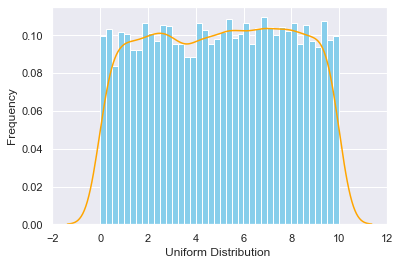

In [10]:
# Plot the binned data in blue. The orange line indicates the kernel density estimation (KDE) of the probability function
# For more information, see https://en.wikipedia.org/wiki/Kernel_density_estimation
ax = sns.distplot(data_uniform,
                  bins=40,
                  kde=True,
                  color='orange',
                  hist_kws={'color':'skyblue', 'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

### The Normal or Gaussian Distribution

In [11]:
# import uniform distribution
from scipy.stats import norm

In [12]:
# generate random numbersfrom N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

/Users/rhennig/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal'), Text(0, 0.5, 'Frequency')]

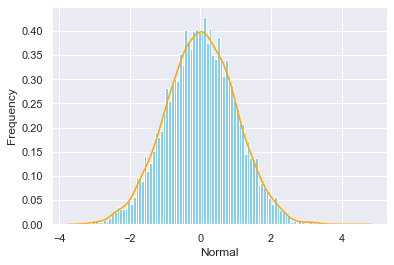

In [13]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='orange',
                  hist_kws={'color':'skyblue', 'alpha':1})
ax.set(xlabel='Normal', ylabel='Frequency')

### The Binomial Distribution
The binomial distribution with parameters $n$ and $p$ is the discrete probability distribution of the number of successes in a sequence of $n$ independent experiments, each asking a yes/no question. Each question has the probability of $p$ for yes and $1-p$ for no.

In [14]:
# Import binom
from scipy.stats import binom

/Users/rhennig/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

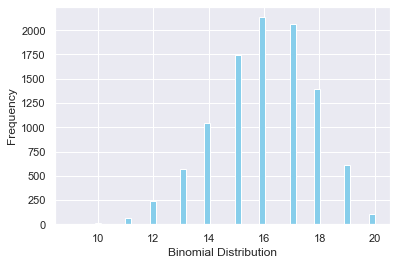

In [15]:
# generate binom
data_binom = binom.rvs(n=20,p=0.8,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='orange',
                  hist_kws={'color':'skyblue', 'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

Since the probability of success was 0.8, which is greater than 0.5 the distribution is skewed towards the right side.

Also, the Poisson distribution is a limiting case of a binomial distribution under the following conditions:
- The number of trials is infinitely large or $n \to \infty$.
- The probability of success for each trial is same and infinitely small or $p \to 0$.
- The product $np=\lambda$ remains finite.

The Normal distribution is another limiting form of binomial distribution under the following conditions:
- The number of trials is infinitely large, $n \to \infty$.
- Neither $p$ nor $q$ are infinitely small.

**Create plots for the Binomial distribution that illustrates how the pdf changes to one that approaches the Poisson distribution and the normal distribution.**

### The Bernoulli Distribution

The Bernoulli distribution is named after the Swiss mathematician Jacob Bernoulli. It is the discrete probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q=1-p$. It can be thought of as a model for the set of possible outcomes of any single experiment that asks a yes/no question.

In [16]:
# Import bernoulli
from scipy.stats import bernoulli

[Text(0.5, 0, 'Bernoulli'), Text(0, 0.5, 'Frequency')]

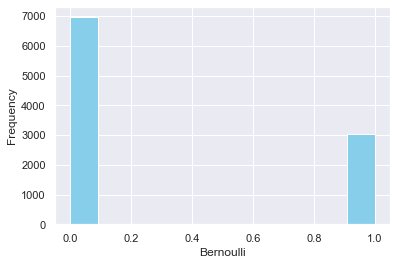

In [17]:
# generate bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.3)
ax= sns.distplot(data_bern,
                 kde=False,
                 color='orange',
                 hist_kws={'color':'skyblue', 'alpha':1})
ax.set(xlabel='Bernoulli', ylabel='Frequency')

### Poisson Distribution

The Poisson distribution is named after the French mathematician Siméon Denis Poisson. It is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.

In [18]:
# Import bernoulli
from scipy.stats import poisson

[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

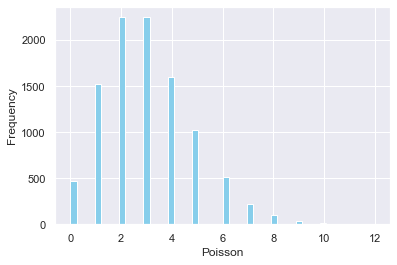

In [19]:
data_poisson = poisson.rvs(mu=3, size=10000)
ax = sns.distplot(data_poisson,
                  kde=False,
                  hist_kws={'color':'skyblue', 'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')